In [ ]:
#pip install pandas numpy matplotlib seaborn missingno scipy

In [ ]:
#initial setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
#importing data

data = arff.loadarff('Training Dataset.arff')
df = pd.DataFrame(data[0])

df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,b'-1',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',b'1',b'-1',b'-1'
1,b'1',b'1',b'1',b'1',b'1',b'-1',b'0',b'1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'-1'
2,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'1',b'-1',b'1',b'-1',b'1',b'0',b'-1',b'-1'
3,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'1',b'1',...,b'1',b'1',b'-1',b'-1',b'1',b'-1',b'1',b'-1',b'1',b'-1'
4,b'1',b'0',b'-1',b'1',b'1',b'-1',b'1',b'1',b'-1',b'1',...,b'-1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'1'


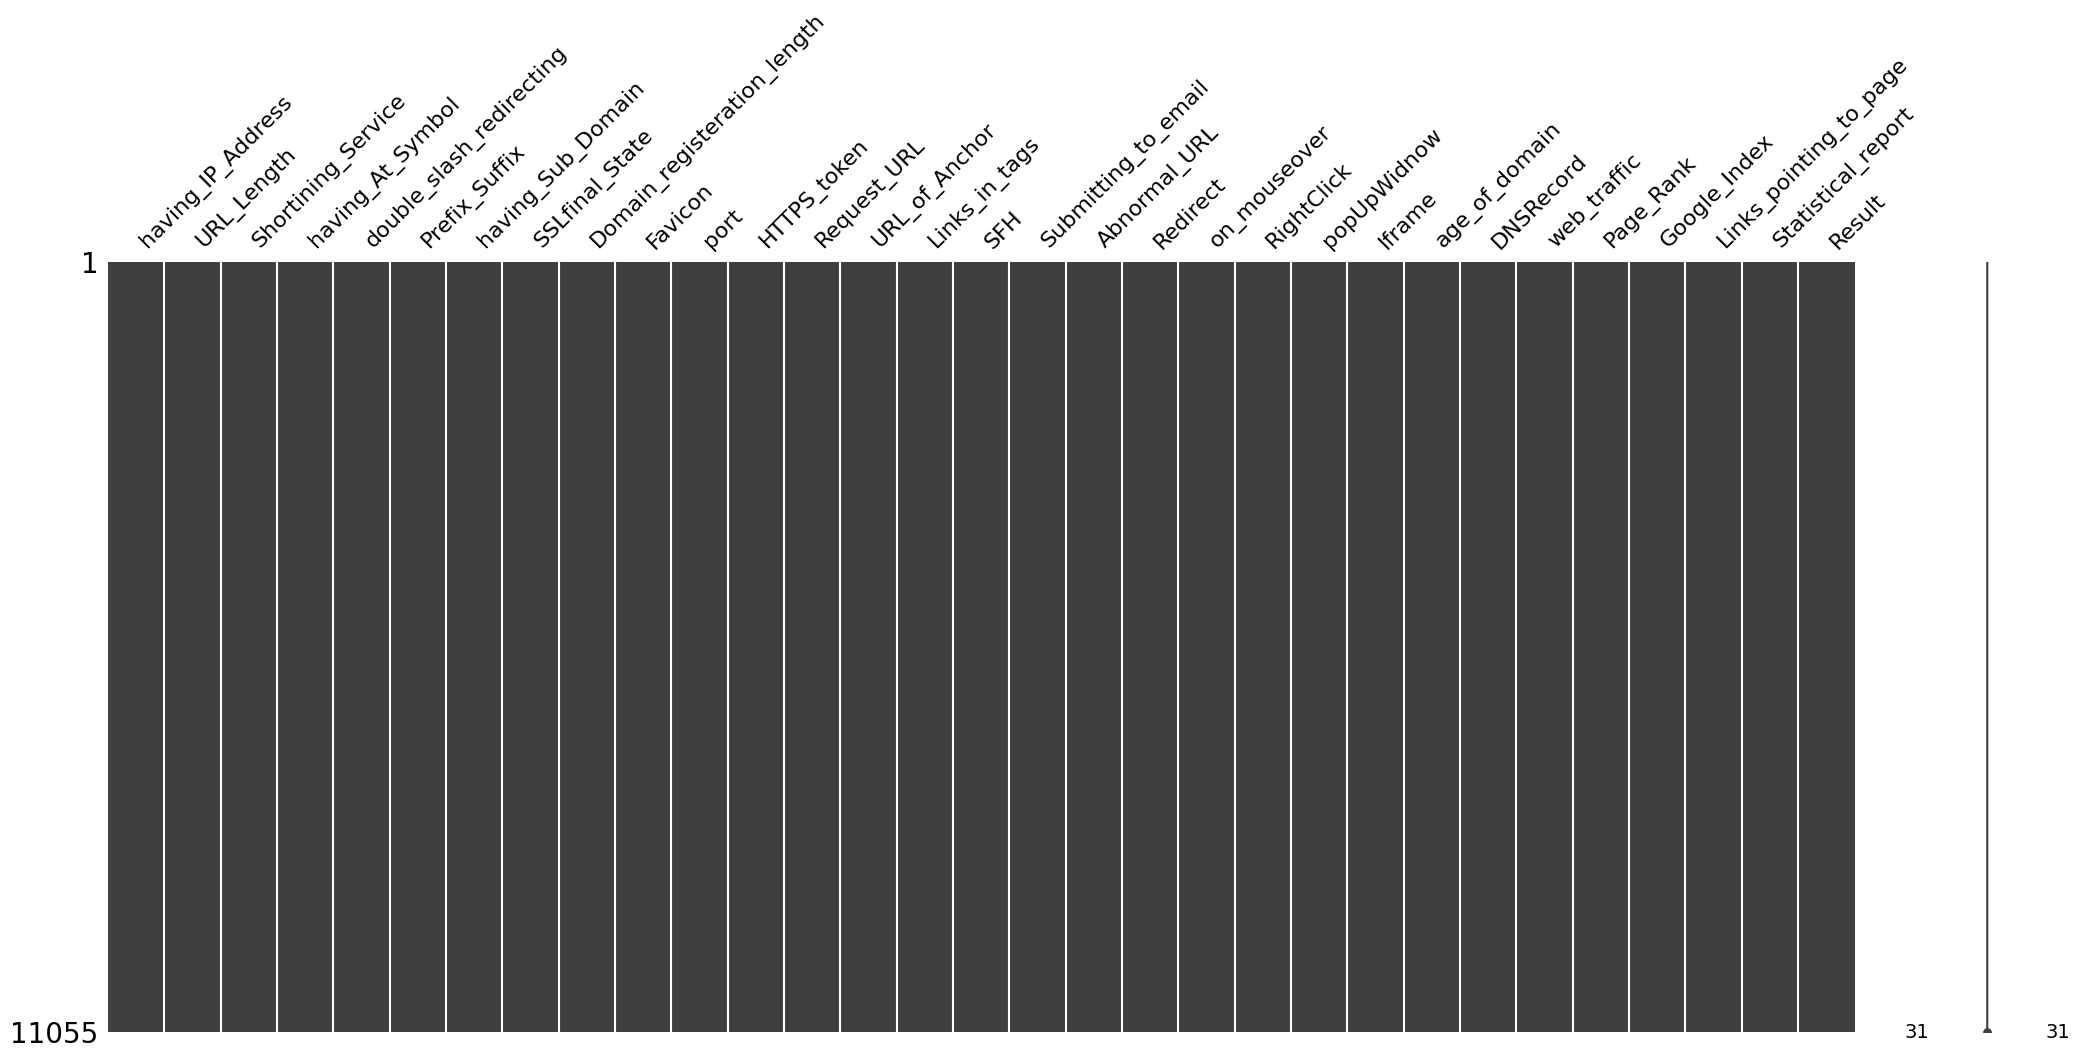

In [ ]:
#missing data check

chart1 = msn.matrix(df)

In [ ]:
#initial data cleanup, removed the b['']

df = df.apply(lambda col: col.str.decode('utf-8').str.strip("'"))
df.head()


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


count     11055
unique        2
top           1
freq       6157
Name: Result, dtype: object


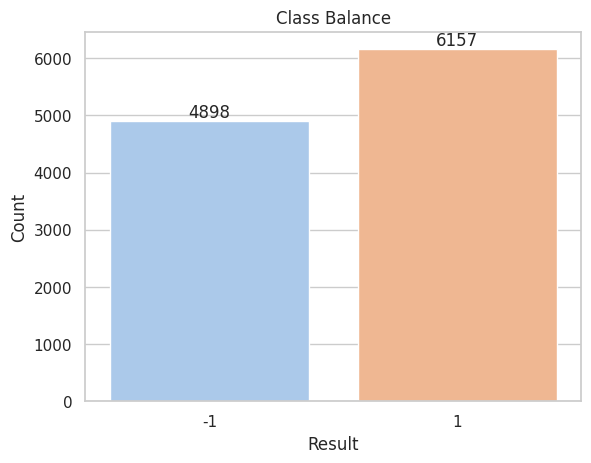

In [ ]:
#target variable description

print(df['Result'].describe())

sns.set(style="whitegrid")
sns.set_palette("pastel")

chart1 = sns.countplot(x="Result", data=df)
plt.title("Class Balance")
plt.xlabel("Result")
plt.ylabel("Count")

for container in chart1.containers:
    chart1.bar_label(container)

plt.show()

In [ ]:
for col in df:
  print(col)

having_IP_Address
URL_Length
Shortining_Service
having_At_Symbol
double_slash_redirecting
Prefix_Suffix
having_Sub_Domain
SSLfinal_State
Domain_registeration_length
Favicon
port
HTTPS_token
Request_URL
URL_of_Anchor
Links_in_tags
SFH
Submitting_to_email
Abnormal_URL
Redirect
on_mouseover
RightClick
popUpWidnow
Iframe
age_of_domain
DNSRecord
web_traffic
Page_Rank
Google_Index
Links_pointing_to_page
Statistical_report
Result


In [ ]:
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,...,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055
unique,2,3,2,2,2,2,3,3,2,2,...,2,2,2,2,3,2,2,3,2,2
top,1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,0,1,1
freq,7262,8960,9611,9400,9626,9590,4070,6331,7389,9002,...,8918,10043,5866,7612,5831,8201,9516,6156,9505,6157


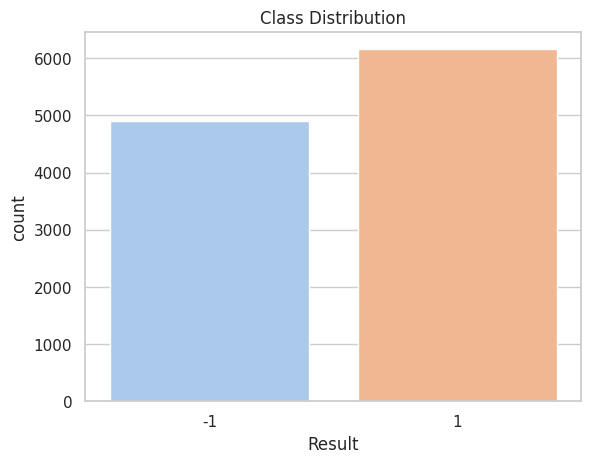

In [ ]:
sns.countplot(x='Result', data=df)
plt.title("Class Distribution")
plt.show()

In [ ]:
X = df.drop("Result", axis=1)
y = df["Result"]

# Feature selection using Extra Trees Classifier
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X, y)

feature_importances = model.feature_importances_

sorted_indices = np.argsort(feature_importances)[::-1]
n_features = X.shape[1]

print("Feature Importances:")
for i in range(n_features):
    print(f"{X.columns[sorted_indices[i]]}: {feature_importances[sorted_indices[i]]}")

Feature Importances:
SSLfinal_State: 0.3290663786383973
URL_of_Anchor: 0.22446178694073476
web_traffic: 0.06667632104050457
having_Sub_Domain: 0.05728352348086894
Prefix_Suffix: 0.04667129611200028
Links_in_tags: 0.039247532262951426
Request_URL: 0.02589263037285798
SFH: 0.022858459409203426
Domain_registeration_length: 0.01948708181566508
Links_pointing_to_page: 0.01913562738655145
age_of_domain: 0.017679653069341012
having_IP_Address: 0.015685226373137406
Page_Rank: 0.012802622701040831
DNSRecord: 0.012750259545703399
Google_Index: 0.0125416464143494
URL_Length: 0.009918296927573164
HTTPS_token: 0.0068911251154426326
Redirect: 0.006061115890166265
popUpWidnow: 0.00598409741138306
Submitting_to_email: 0.005820275237885689
having_At_Symbol: 0.0057666109607672
Shortining_Service: 0.0055285717624203425
Statistical_report: 0.005247347568604121
Abnormal_URL: 0.0050832567856791645
Favicon: 0.004897024724436952
double_slash_redirecting: 0.004677013575762757
on_mouseover: 0.004226531248608848

Data Types:
having_IP_Address              int64
URL_Length                     int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_State                 int64
Domain_registeration_length    int64
Favicon                        int64
port                           int64
HTTPS_token                    int64
Request_URL                    int64
URL_of_Anchor                  int64
Links_in_tags                  int64
SFH                            int64
Submitting_to_email            int64
Abnormal_URL                   int64
Redirect                       int64
on_mouseover                   int64
RightClick                     int64
popUpWidnow                    int64
Iframe                         int64
age_of_domain                  int64
DNSRecord                      int64
web_traffic                    int64
Page_Rank                 

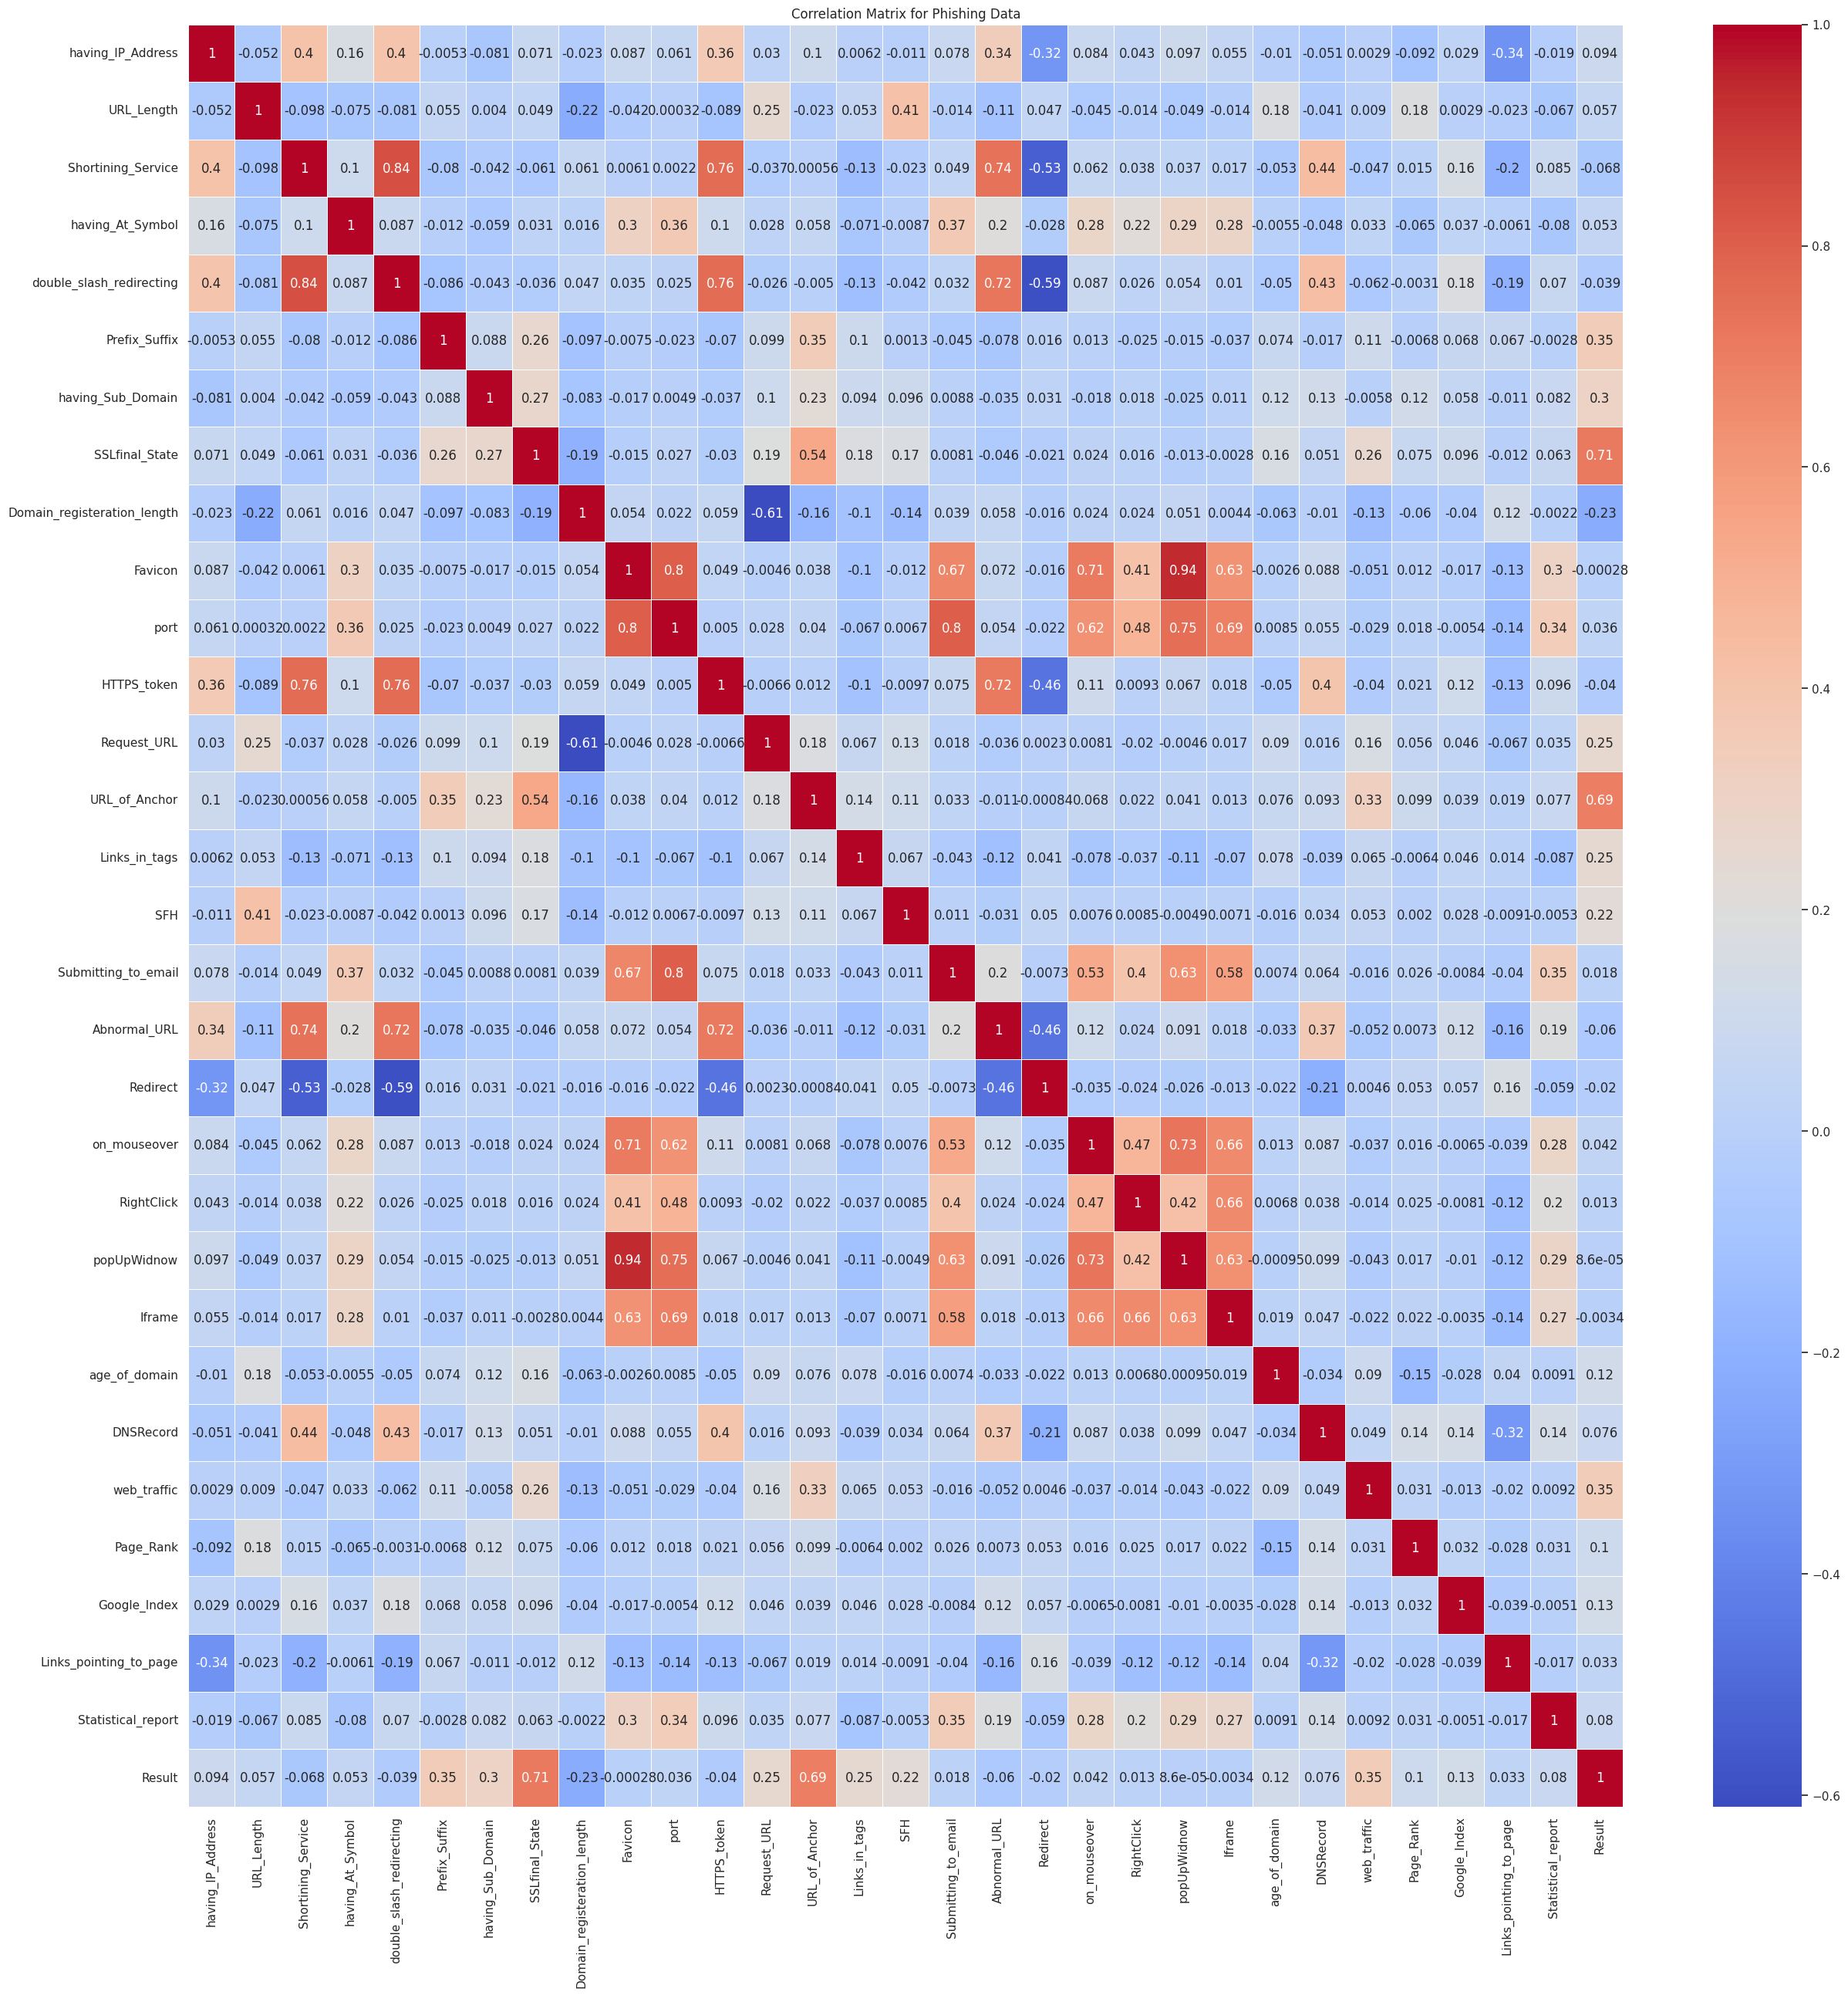

In [ ]:
data_types = df.dtypes
print("Data Types:")
print(data_types)

# Label encode 'object' columns to convert them to numeric
label_encoder = LabelEncoder()
object_columns = df.select_dtypes(include=['object']).columns

for column in object_columns:
    df[column] = label_encoder.fit_transform(df[column])

correlation_matrix = df.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Phishing Data')
plt.show()

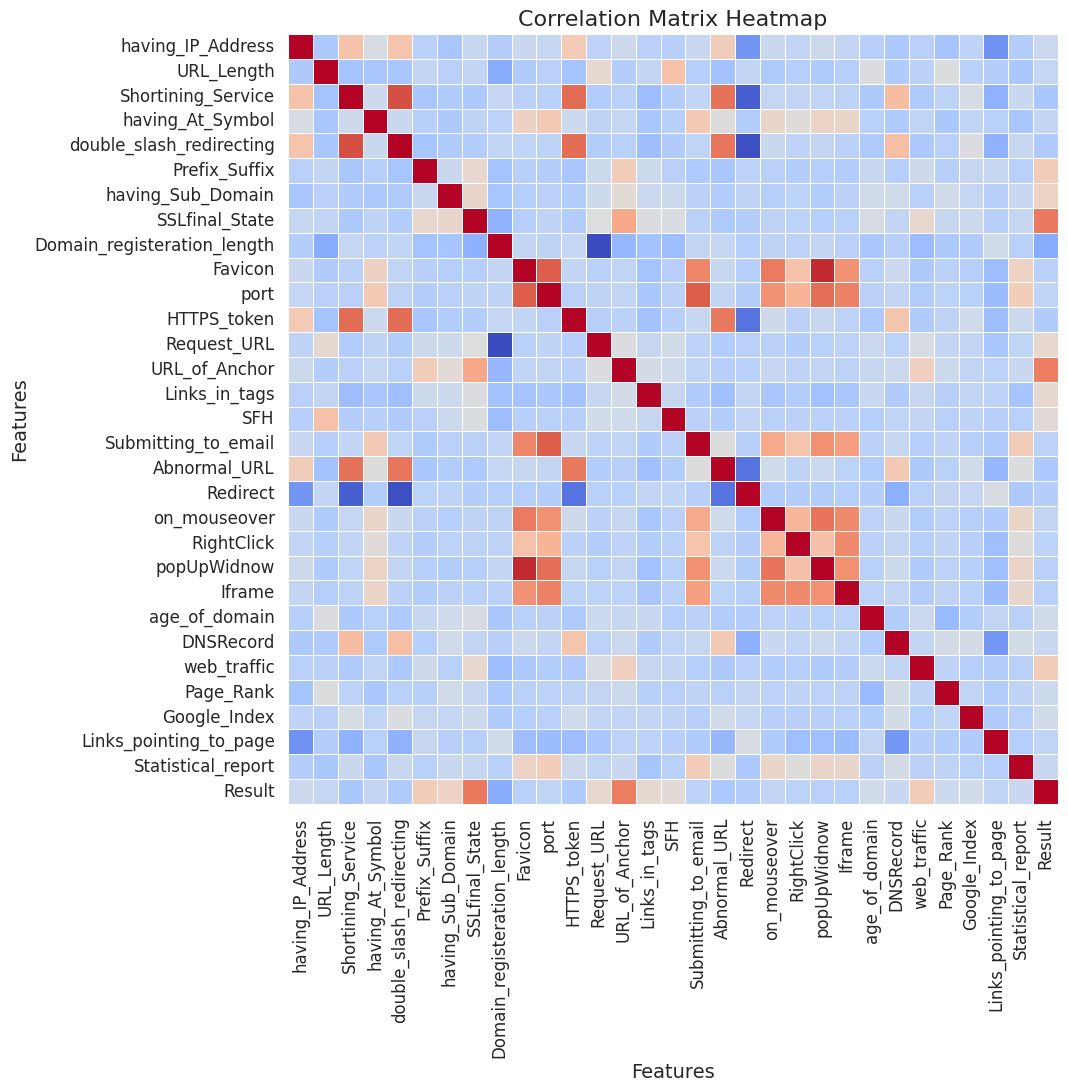

In [ ]:
# Correlation matrix without annotations
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5, cbar=False, square=True)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

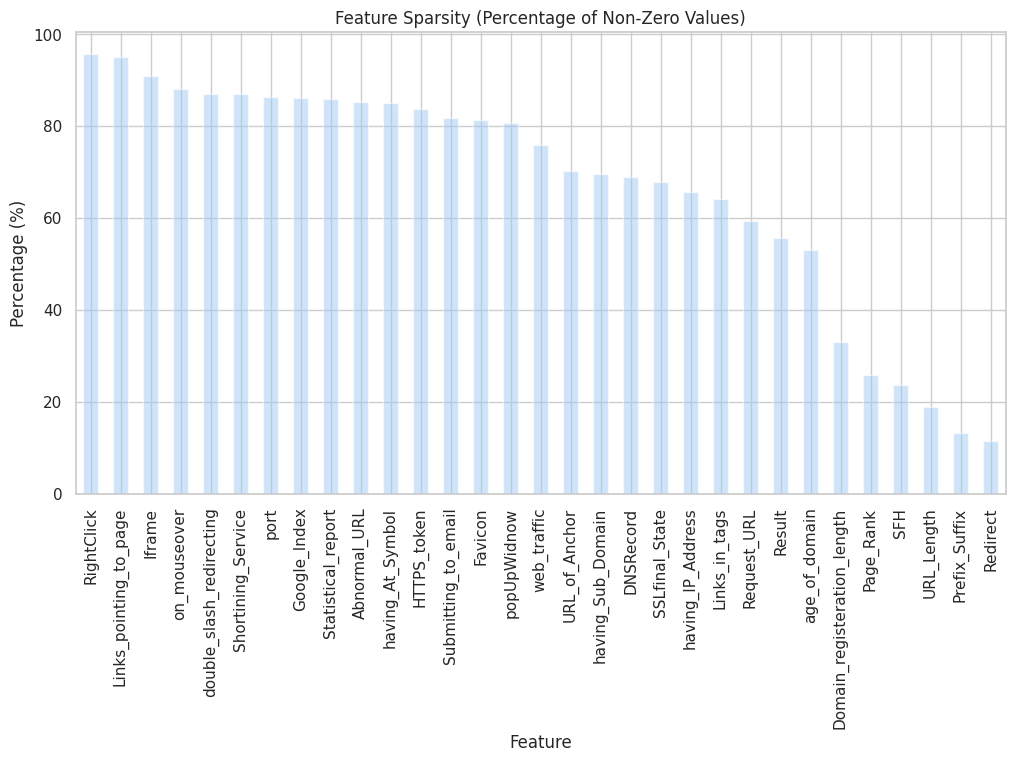

In [ ]:
# Calculate the percentage of non-zero values for each feature
feature_sparsity = (df != 0).sum() / len(df) * 100
plt.figure(figsize=(12, 6))
feature_sparsity.sort_values(ascending=False).plot(kind='bar', alpha=0.5)
plt.title("Feature Sparsity (Percentage of Non-Zero Values)")
plt.xlabel("Feature")
plt.ylabel("Percentage (%)")
plt.show()